In [2]:
%matplotlib inline
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd
import keras
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


### Create a Model

In [2]:
def createToyModel(input_dim):
    model = Sequential()
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='tanh'))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

### Test a Batch

In [3]:
data = pd.read_csv("X_y.csv")
data = data.drop(columns=['date', 'home_team_api_id', 'away_team_api_id', 'match_api_id', 'Unnamed: 0',
                         'home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_player_8',
 'home_player_9',
 'home_player_10',
 'home_player_11',
 'away_player_1',
 'away_player_2',
 'away_player_3',
 'away_player_4',
 'away_player_5',
 'away_player_6',
 'away_player_7',
 'away_player_8',
 'away_player_9',
 'away_player_10',
 'away_player_11',])
data.head()
data_array = data[data.columns[:-2]].values
# print(data_array.shape)
list(data.columns[:])

['home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 'home_buildUpPlaySpeed',
 'home_buildUpPlayDribbling',
 'home_buildUpPlayPassing',
 'home_chanceCreationPassing',
 'home_chanceCreationCrossing',
 'home_ch

In [4]:
label_array = data[data.columns[-2]].values
label_array = [i + 1 for i in label_array]
label_array = array(label_array)
encoded_labels = to_categorical(label_array)
encoded_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [5]:
test_model = createToyModel(data_array[0].shape[0])

Instructions for updating:
Colocations handled automatically by placer.


In [100]:
batch_size = 16
test_model.fit(x=X_res, y=y_res, validation_data=(scaler.transform(X_test), y_test), batch_size=batch_size, epochs=10)

Train on 19362 samples, validate on 6018 samples
Epoch 1/10
19362/19362 [==============================] - 2s 128us/step - loss: 1.0354 - acc: 0.4665 - val_loss: 1.1682 - val_acc: 0.3124
Epoch 2/10
19362/19362 [==============================] - 2s 119us/step - loss: 1.0264 - acc: 0.4707 - val_loss: 1.1647 - val_acc: 0.3249
Epoch 3/10
19362/19362 [==============================] - 2s 119us/step - loss: 1.0221 - acc: 0.4756 - val_loss: 1.1675 - val_acc: 0.3247
Epoch 4/10
19362/19362 [==============================] - 2s 122us/step - loss: 1.0137 - acc: 0.4820 - val_loss: 1.1732 - val_acc: 0.3202
Epoch 5/10
19362/19362 [==============================] - 2s 126us/step - loss: 1.0066 - acc: 0.4917 - val_loss: 1.1714 - val_acc: 0.3272
Epoch 6/10
19362/19362 [==============================] - 2s 123us/step - loss: 1.0000 - acc: 0.4939 - val_loss: 1.1921 - val_acc: 0.3184
Epoch 7/10
19362/19362 [==============================] - 3s 130us/step - loss: 0.9932 - acc: 0.4994 - val_loss: 1.2029 - v

In [44]:

#test_pred = test_model.predict(scaler.transform(X_test), y_test)
test_model.evaluate(scaler.transform(X_test), y_test)

6018/6018 [==============================] - 0s 39us/step


[1.171625783808725, 0.4350282485875706]

In [29]:
np.sum(label_array == 2)/label_array.shape[0]

0.4576769690927218

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
X, y = data_array, encoded_labels
n = X.shape[0]
m = int(n * .7)
X_train, y_train = X[:m, :], y[:m, :]
X_test, y_test = X[m:, :], y[m:, :]
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)

X_res, y_res = SMOTE().fit_resample(X_train, y_train)

In [21]:
for i in range(22):
    print(pd.Series(X_res[:, i]).describe())
    print(pd.Series(X_train[:, i]).describe())
    print('========')


count    19362.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64
count    14042.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64
count    19362.000000
mean         2.083185
std          0.361115
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
dtype: float64
count    14042.000000
mean         2.086882
std          0.383032
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
dtype: float64
count    19362.000000
mean         4.064275
std          0.359344
min          2.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          8.000000
dtype: float64
count    14042.000000
mean         4.066800
std          0.378481
min          2.000000
25%          4.000000
50%          4.

In [10]:
from sklearn.decomposition import PCA
pca = PCA(18)

In [11]:
res = pca.fit(X_train)
print(pca.explained_variance_ratio_) 
print(np.sum(pca.explained_variance_ratio_))



[0.12322064 0.09730414 0.09309343 0.08652263 0.07224199 0.07034621
 0.0676396  0.05443493 0.04647974 0.04626208 0.04479983 0.03667015
 0.03192457 0.03117801 0.02855583 0.02832336 0.02377913 0.01722373]
1.0


In [12]:
from sklearn.manifold import TSNE
X_vis = TSNE().fit_transform(X_train)


In [71]:
X_vis.shape

(14042, 2)

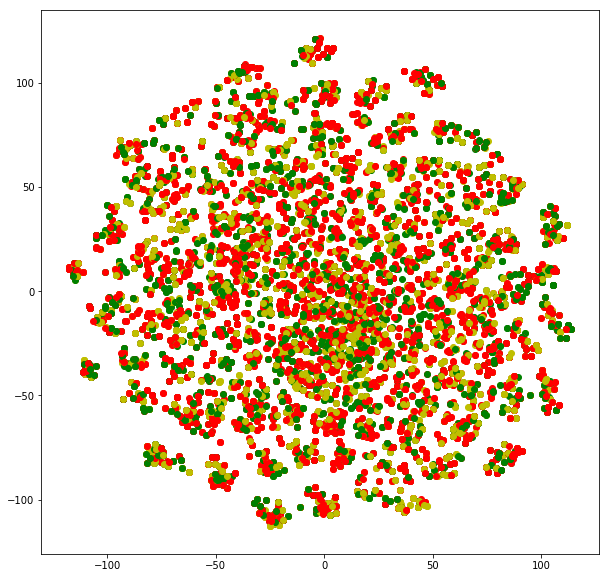

In [13]:
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
plt.figure(figsize=(10,10))
#plt.scatter(X_vis[:, 0], X_vis[:, 1])
colors = ['g', 'y', 'r']
for i in tqdm_notebook(range(X_vis.shape[0])):
    row = X_vis[i]
    plt.scatter(row[0], row[1], color=colors[int(label_array[i])])


In [110]:
plt.show()